In [1]:
#Librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Data
df = pd.read_csv("responses.csv")
df.shape

(1010, 150)

In [3]:
df = df.iloc[:, 76:133]
df.head(5)

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,...,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,...,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day
1,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,...,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day
2,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,...,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day
3,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,...,2.0,2.0,1.0,2.0,1.0,1.0,NaN,2.0,4.0,most of the day
4,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,...,3.0,5.0,3.0,3.0,2.0,4.0,3.0,3.0,3.0,few hours a day


# 1.Preparing the data

In [4]:
#Drop NAs
df = df.dropna()
#...............................................................................................
#Encode categorical data
from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)
df

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,...,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage
0,1,1,4,3,1,4,3,3,0,2,...,3,4,0,3,2,1,2,3,2,0
1,2,1,3,4,3,0,3,3,2,3,...,3,2,4,2,3,4,2,1,2,0
2,0,1,4,2,4,2,3,4,0,4,...,3,3,2,2,2,3,4,2,0,0
4,2,0,1,2,4,4,4,3,1,2,...,2,4,2,2,1,3,2,2,2,0
5,1,1,2,2,2,0,2,3,2,1,...,2,3,3,2,2,2,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2,1,0,3,1,2,2,2,3,3,...,3,2,2,2,3,4,3,3,2,0
1006,0,2,0,4,4,4,4,3,0,1,...,3,3,2,4,2,0,2,3,2,1
1007,2,0,0,0,3,0,2,4,0,3,...,2,0,2,1,2,4,0,3,4,2
1008,2,0,4,0,2,3,3,3,4,2,...,2,1,1,3,0,4,2,2,2,2


# 2. Choosing the factors

In [5]:
pip install factor_analyzer 

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42071 sha256=ae37063d49502c4bcee0f3dbcc95d9067d830d873874c3f79c562eb60861eed7
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\6d\32\bd\460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor-analyzer
Note: you may need to restart the kernel to use updated packages.


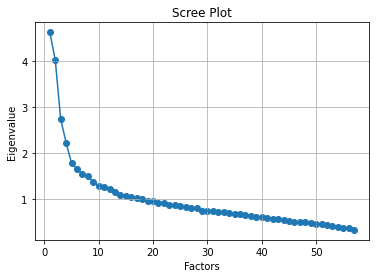

In [6]:
#Try the model with all the variables 
from factor_analyzer import FactorAnalyzer         # pip install factor_analyzer 
fa = FactorAnalyzer(rotation="varimax")
fa.fit(df) 

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

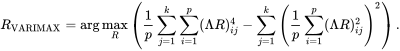

In [7]:
from IPython.display import display, Image
display(Image(filename='Varimax.png'))

In [8]:
#As you can see the most usefull factors for explain the data are between 5-6 until falling significantly.
#We will fit the model with 5 Factors:

In [9]:
#Factor analysis with 5 fators
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df)
AF = fa.loadings_
AF = pd.DataFrame(AF)
AF.index = df.columns
AF

,0,1,2,3,4
Daily events,0.250416,0.058953,0.206877,0.026094,0.028915
Prioritising workload,-0.012803,-0.150045,0.555946,0.078913,0.128156
Writing notes,-0.006039,-0.015927,0.420849,0.225307,0.261380
Workaholism,0.069524,0.029275,0.527082,0.088573,0.032979
Thinking ahead,0.023475,0.127909,0.530457,0.035213,0.055426
Final judgement,0.046188,0.112493,0.119861,0.381338,-0.039756
Reliability,0.061028,-0.102481,0.539373,0.073534,-0.003491
Keeping promises,0.053358,-0.034661,0.420538,0.121450,-0.033511
Loss of interest,0.273777,0.226286,0.003524,-0.149262,0.101882
Friends versus money,0.021279,-0.111839,0.022026,0.381357,-0.045824


In [10]:
#Get Top variables for each Factor 
F = AF.unstack()
F = pd.DataFrame(F).reset_index()
F = F.sort_values(['level_0',0], ascending=False).groupby('level_0').head(5)    # Top 5 
F = F.sort_values(by="level_0")
F.columns=["FACTOR","Variable","Varianza_Explica"]
F = F.reset_index().drop(["index"],axis=1)
F

,FACTOR,Variable,Varianza_Explica
0,0,New environment,0.470076
1,0,Energy levels,0.499978
2,0,Number of friends,0.514994
3,0,Socializing,0.537811
4,0,Knowing the right people,0.478657
5,1,Mood swings,0.353226
6,1,Self-criticism,0.398420
7,1,Fake,0.469617
8,1,Changing the past,0.482307
9,1,Loneliness,0.542350


In [11]:
#Show the Top for each Factor 
F = F.pivot(columns='FACTOR')["Variable"]
F.apply(lambda x: pd.Series(x.dropna().to_numpy()))

FACTOR,0,1,2,3,4
0,New environment,Mood swings,Writing notes,Friends versus money,Appearence and gestures
1,Energy levels,Self-criticism,Workaholism,Life struggles,Life struggles
2,Number of friends,Fake,Thinking ahead,Finding lost valuables,Mood swings
3,Socializing,Changing the past,Prioritising workload,Children,Health
4,Knowing the right people,Loneliness,Reliability,God,Getting angry


FACTOR 1: Energy levels, Number of friends, Socializing...

Could be: Extraversion

FACTOR 2: Self-ciricism, Fake, Loneliness...

Looks very similar to "Neuroticism"

Factor 3: Thinking ahead, Prioritising workload...

very similar to "Conscientiousness"

Factor 4: Children, God, Finding lost valuables

This factor could be something like "religious" or "conservative", maybe have lowest scores of a "Openness" in Big Five model.

Factor 5: Appearence and gestures, Mood swings

Mmmm it could be "Agreeableness". What do you think it could be represent?

# Conclusion



The first three Factors are very clear: Extraversion, Neuroticism and Conscientiousness. The other two not to much. Anyway is a very interesting approximation

Maybe doing first a PCA for remove hight correlate variables like "God" and "Final judgement"could help.

What do you think?